In [1]:
import numpy as np
import pandas as pd

from astropy import coordinates
from astropy.coordinates import match_coordinates_sky
import astropy.units as u
import astroquery
from astroquery.irsa import Irsa
from astroquery.vizier import Vizier
from astropy.table import Table, join, Column, hstack

from astropy.units import Quantity
from astroquery.gaia import Gaia

Irsa.ROW_LIMIT = -1
Vizier.ROW_LIMIT = -1

from astropy.io import ascii as asci

import matplotlib.pyplot as plt

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


# Get the data

# Try GAIA and 2MASS

- in gaiadr1 and gaiadr2 they also provide 2mass, allwise, sdss "best neigbour" pairs 
- catalogs provided by GAIA:
    - gaiadr1.gaiadr1.allwise_original_valid
    - gaiadr1.gaiadr1.gsc23_original_valid
    - gaiadr1.gaiadr1.ppmxl_original_valid
    - gaiadr1.gaiadr1.sdssdr9_original_valid
    - gaiadr1.gaiadr1.tmass_original_valid
    - gaiadr1.gaiadr1.ucac4_original_valid
    - gaiadr1.gaiadr1.urat1_original_valid

In [2]:
cmd = "SELECT * FROM gaiadr2.gaia_source AS g, \
gaiadr2.tmass_best_neighbour AS tbest, \
gaiadr1.tmass_original_valid AS tmass \
WHERE g.source_id = tbest.source_id AND tbest.tmass_oid = tmass.tmass_oid \
AND pmra IS NOT NULL AND abs(pmra)<3 \
AND pmdec IS NOT NULL AND abs(pmdec)<3;"

print(cmd)

job1 = Gaia.launch_job_async(cmd, dump_to_file=True)
print (job1)

SELECT * FROM gaiadr2.gaia_source AS g, gaiadr2.tmass_best_neighbour AS tbest, gaiadr1.tmass_original_valid AS tmass WHERE g.source_id = tbest.source_id AND tbest.tmass_oid = tmass.tmass_oid AND pmra IS NOT NULL AND abs(pmra)<3 AND pmdec IS NOT NULL AND abs(pmdec)<3;


KeyboardInterrupt: 

In [ ]:
gaia_2mass = job1.get_results()
print(len(gaia_2mass['source_id']))

In [6]:
print(gaia_2mass['ra', 'dec', 'ra_2', 'dec_2', 'phot_g_mean_mag', 'j_m']) 

        ra                 dec           ra_2     dec_2   phot_g_mean_mag  j_m  
       deg                 deg           deg       deg          mag        mag  
------------------ ------------------- -------- --------- --------------- ------
 2.390732751830467  -6.546052592994798 2.390773 -6.545917        19.06598 16.697
2.4119940994386777     -6.754831866119 2.411859 -6.754753       19.486813 16.568
2.5428858650859794 -6.5427542995979895 2.542791 -6.542633       18.801517 16.587
2.4657746243804772  -6.770026089663108 2.465807 -6.769865       17.345057 15.999
2.3905290941368316   -6.77431073539794  2.39051 -6.774295       18.668016 16.393
2.3086280130046433  -6.561269746375928 2.308625 -6.561272       16.346586 15.294
2.5481475582031994  -6.547613323459481 2.548208 -6.547598       15.356233 13.953
 2.471145860590163  -6.553873161367393 2.471155  -6.55382       18.073174  16.36
2.3531584034045467  -6.496694070310528 2.353204 -6.496691       18.862864 15.971
2.5050560809614733  -6.50082

# Try GAIA and WISE

In [7]:
cmd = "SELECT * FROM gaiadr2.gaia_source AS g, \
gaiadr2.allwise_best_neighbour AS wbest, \
gaiadr1.allwise_original_valid AS allwise \
WHERE g.source_id = wbest.source_id AND wbest.allwise_oid = allwise.allwise_oid AND CONTAINS(POINT('ICRS',g.ra,g.dec),\
CIRCLE('ICRS'," + str(obj_ra) + "," + str(obj_dec) + "," + str(cone_radius) + "))=1;"

print(cmd)

job2 = Gaia.launch_job_async(cmd, dump_to_file=True)
print(job2)

SELECT * FROM gaiadr2.gaia_source AS g, gaiadr2.allwise_best_neighbour AS wbest, gaiadr1.allwise_original_valid AS allwise WHERE g.source_id = wbest.source_id AND wbest.allwise_oid = allwise.allwise_oid AND CONTAINS(POINT('ICRS',g.ra,g.dec),CIRCLE('ICRS',1.55789,-6.39315,1))=1;
Jobid: 1543009638516O
Phase: COMPLETED
Owner: None
Output file: async_20181123184718.vot
Results: None


In [8]:
gaia_wise = job2.get_results()
print(len(gaia_wise['source_id']))

6152


In [22]:
print(gaia_wise['ra', 'dec', 'ra_2', 'dec_2', 'phot_g_mean_mag']) 

        ra                 dec            ra_2     dec_2    phot_g_mean_mag
       deg                 deg            deg       deg           mag      
------------------ ------------------- --------- ---------- ---------------
 2.390732751830467  -6.546052592994798 2.3906145 -6.5460367        19.06598
 2.413609091643484  -6.761400254617428 2.4134981 -6.7613324        20.64247
2.4010325276847246  -6.364152975991029 2.4009242 -6.3641124       21.189331
2.4119940994386777     -6.754831866119  2.411886 -6.7547434       19.486813
2.5428858650859794 -6.5427542995979895 2.5428842 -6.5427375       18.801517
2.4657746243804772  -6.770026089663108  2.465796 -6.7700469       17.345057
2.3905290941368316   -6.77431073539794 2.3905771 -6.7742426       18.668016
2.3086280130046433  -6.561269746375928 2.3086345 -6.5612655       16.346586
2.1726453152015313  -6.563759656023078 2.1727387 -6.5638607        20.12918
2.5481475582031994  -6.547613323459481 2.5481413 -6.5476079       15.356233
            

## Combine

In [10]:
sep_min = 1.0 * u.arcsec # minimum separation in arcsec

In [38]:
# Using GAIA coord
# ref_epoch: J2015.5

ra_2mass = gaia_2mass['ra']
dec_2mass = gaia_2mass['dec']
c_2mass = coordinates.SkyCoord(ra=ra_2mass, dec=dec_2mass, unit=(u.deg, u.deg), frame="icrs")

ra_wise  = gaia_wise['ra']
dec_wise = gaia_wise['dec']
c_wise = coordinates.SkyCoord(ra=ra_wise, dec=dec_wise, unit=(u.deg, u.deg), frame="icrs")

In [39]:
idx_2mass1, idx_wise1, d2d, d3d = c_wise.search_around_sky(c_2mass, sep_min)
# select only one nearest if there are more in the search reagion (minimum seperation parameter)!

print("GAIA + 2MASS + WISE (using gaia coord): ", len(idx_2mass1))

GAIA + 2MASS + WISE (using gaia coord):  3840


In [40]:
#####
# Using 2MASS and WISE coord
# ra_2 and dec_2 here are RA and DEC of 2MASS and WISE accordingly

ra_2mass = gaia_2mass['ra_2']
dec_2mass = gaia_2mass['dec_2']
c_2mass = coordinates.SkyCoord(ra=ra_2mass, dec=dec_2mass, unit=(u.deg, u.deg), frame="icrs")

ra_wise  = gaia_wise['ra_2']
dec_wise = gaia_wise['dec_2']
c_wise = coordinates.SkyCoord(ra=ra_wise, dec=dec_wise, unit=(u.deg, u.deg), frame="icrs")

In [41]:
idx_2mass2, idx_wise2, d2d, d3d = c_wise.search_around_sky(c_2mass, sep_min)
# select only one nearest if there are more in the search reagion (minimum seperation parameter)!

print("GAIA + 2MASS + WISE (using 2MASS-WISE coord): ", len(idx_2mass2))

GAIA + 2MASS + WISE (using 2MASS-WISE coord):  3730


In [42]:
print("Confusion level :", abs(len(idx_2mass1) - len(idx_2mass2))/3840. * 100, '%')

Confusion level : 2.864583333333333 %


In [48]:
# Combine dataset
# GAIA-WISE
# GAIA-2MASS

# result of match with each other
gaia_2mass___wise = gaia_2mass[idx_2mass2] 
gaia_wise___2mass = gaia_wise[idx_wise2]

#Check
if np.all(gaia_2mass___wise['solution_id'] == gaia_wise___2mass['solution_id']):
    # remove duplicating data 
    # remove duplicating IDs in each dataset
    gaia_wise___2mass.remove_columns(['source_id_2', 'designation_2', 'allwise_oid_2'])
    gaia_2mass___wise.remove_columns(['source_id_2', 'designation_2', 'tmass_oid_2'])
    
    # remove gaia data from gaia_wise___2mas
    gaia_wise___2mass.remove_columns(['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_flux_over_error', 'phot_g_mean_mag', 'phot_bp_n_obs', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error', 'phot_bp_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_rp_n_obs', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error', 'phot_rp_mean_flux_over_error', 'phot_rp_mean_mag', 'phot_bp_rp_excess_factor', 'phot_proc_mode', 'bp_rp', 'bp_g', 'g_rp', 'radial_velocity', 'radial_velocity_error', 'rv_nb_transits', 'rv_template_teff', 'rv_template_logg', 'rv_template_fe_h', 'phot_variable_flag', 'l', 'b', 'ecl_lon', 'ecl_lat', 'priam_flags', 'teff_val', 'teff_percentile_lower', 'teff_percentile_upper', 'a_g_val', 'a_g_percentile_lower', 'a_g_percentile_upper', 'e_bp_min_rp_val', 'e_bp_min_rp_percentile_lower', 'e_bp_min_rp_percentile_upper', 'flame_flags', 'radius_val', 'radius_percentile_lower', 'radius_percentile_upper', 'lum_val', 'lum_percentile_lower', 'lum_percentile_upper', 'datalink_url', 'epoch_photometry_url'])

    # merge (hstack)
    gaia_2mass_wise = hstack([gaia_2mass___wise, gaia_wise___2mass], 
                           table_names=['2mass', 'wise'],
                           uniq_col_name='{table_name}_{col_name}')
    print("Merge...")
    print(len(gaia_2mass_wise))
else:
    print("Big Error: not match")

Merge...
3730


In [56]:
print(gaia_2mass_wise.colnames)

['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_erro

In [78]:
# Make a sample of galaxy using W1-J cut
w1j = gaia_2mass_wise['w1mpro'] - gaia_2mass_wise['j_m']
cutw1j = -1.7
galaxy_sample = gaia_2mass_wise[w1j<cutw1j]

In [86]:
# Make a sample of star using large proper motion
cut1 = gaia_2mass_wise[gaia_2mass_wise['pmra'] > 2]
star_sample = gaia_2mass_wise[gaia_2mass_wise['pmdec'] > 2]

### Plot W1-J vs J

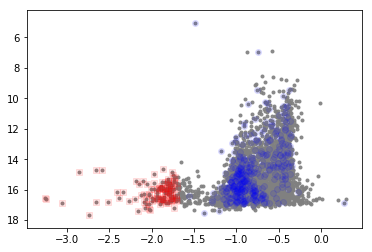

In [89]:
plt.scatter(gaia_2mass_wise['w1mpro'] - gaia_2mass_wise['j_m'], gaia_2mass_wise['j_m'], 
            marker='.', color='gray', alpha=0.9)
plt.scatter(galaxy_sample['w1mpro'] - galaxy_sample['j_m'], galaxy_sample['j_m'], 
            marker='s', color='red', alpha=0.1)
plt.scatter(star_sample['w1mpro'] - star_sample['j_m'], star_sample['j_m'], 
            marker='o', color='blue', alpha=0.1)

plt.gca().invert_yaxis()

In [115]:
# list of parameters
params = ['j_m', 'h_m', 'ks_m', 
          'w1mpro', 'w2mpro', 'w3mpro', 'w4mpro', 
          'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag']

In [176]:
## check Masked value
# unmasked value = 0 
# NaN, INF
ma_p = np.zeros(len(params))
for i,p in enumerate(params):
    for data in gaia_2mass_wise[p]:
        if data is ma.masked:
            ma_p[i] += 1
    
    print(p, ma_p[i])

j_m 0.0
h_m 0.0
ks_m 0.0
w1mpro 0.0
w2mpro 0.0
w3mpro 0.0
w4mpro 2.0
phot_g_mean_mag 0.0
phot_bp_mean_mag 58.0
phot_rp_mean_mag 58.0


In [189]:
58/3730.

0.015549597855227882

In [214]:
np.mean(gaia_2mass_wise['phot_bp_mean_mag'])

17.87847222222222

In [193]:
np.where(gaia_2mass_wise['phot_bp_mean_mag'] == ma.masked)

(array([  13,   14,   27,  228,  262,  300,  346,  381,  382,  414,  437,
         483,  565,  587,  611,  645,  685,  820,  985, 1098, 1126, 1128,
        1189, 1238, 1239, 1281, 1360, 1481, 1542, 1702, 1717, 1748, 1800,
        1859, 2023, 2024, 2123, 2124, 2204, 2331, 2422, 2423, 2526, 2607,
        2778, 2838, 2918, 2979, 3051, 3088, 3114, 3204, 3205, 3279, 3504,
        3531, 3557, 3596]),)

In [201]:
maske = gaia_2mass_wise['phot_bp_mean_mag'][gaia_2mass_wise['phot_bp_mean_mag'] == ma.masked]
print(maske)

phot_bp_mean_mag
      mag       
----------------
              --
              --
              --
              --
              --
              --
              --
              --
              --
              --
             ...
              --
              --
              --
              --
              --
              --
              --
              --
              --
              --
Length = 58 rows


In [208]:
maske.data

masked_BaseColumn(data=[--, --, --, --, --, --, --, --, --, --, --, --,
                        --, --, --, --, --, --, --, --, --, --, --, --,
                        --, --, --, --, --, --, --, --, --, --, --, --,
                        --, --, --, --, --, --, --, --, --, --, --, --,
                        --, --, --, --, --, --, --, --, --, --],
                  mask=[ True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,
                         True,  True,  True,  True,  True,  True,  True,
                         True,  True],
            fill_value=1

In [260]:
x = np.array([1, 2, 3, -1, 5])

In [261]:
mx = ma.masked_array(x, mask=[0, 0, 0, 1, 0])
mx

masked_array(data=[1, 2, 3, --, 5],
             mask=[False, False, False,  True, False],
       fill_value=999999)

In [262]:
mx.data

array([ 1,  2,  3, -1,  5])

In [263]:
np.mean(mx.data)

2.0

In [264]:
np.mean(mx)

2.75

In [265]:
print(mx)
print(x)

[1 2 3 -- 5]
[ 1  2  3 -1  5]


In [269]:
a = np.copy(maske)

In [271]:
maske

--
--
--
--
--
--
--
--
--
--
--


In [268]:
print(a)
print(mx)
print(x)

[ 1  2  3 -1  5]
[1 2 3 -- 5]
[ 1  2  3 -1  5]
